In [12]:
import numpy as np
import pandas as pd
import os
import sklearn

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [14]:
PATH = os.getcwd()
print(PATH)
PATH = './images/'
data_dir_list = os.listdir(PATH)
data_dir_list.sort(key=int)
print(data_dir_list)

C:\Users\Ashik\Desktop\thesis_final_code
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']


In [15]:
img_rows=44
img_cols=44
num_channel=3

num_epoch = 20
batch_size = 256

img_data_list=[]
classes_names_list=[]
target_column=[]

In [16]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(PATH+'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from 0 folder

Getting images from 1 folder

Getting images from 2 folder

Getting images from 3 folder

Getting images from 4 folder

Getting images from 5 folder

Getting images from 6 folder

Getting images from 7 folder

Getting images from 8 folder

Getting images from 9 folder

Getting images from 10 folder

Getting images from 11 folder

Getting images from 12 folder

Getting images from 13 folder

Getting images from 14 folder

Getting images from 15 folder

Getting images from 16 folder

Getting images from 17 folder

Getting images from 18 folder

Getting images from 19 folder

Getting images from 20 folder

Getting images from 21 folder

Getting images from 22 folder

Getting images from 23 folder

Getting images from 24 folder

Getting images from 25 folder

Getting images from 26 folder

Getting images from 27 folder

Getting images from 28 folder

Getting images from 29 folder

Getting images from 30 folder

Getting images from 31 folder

Getting images fro

In [17]:
num_classes = len(classes_names_list)
print(num_classes)

60


In [18]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

(116400, 44, 44, 3)


In [19]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [20]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [21]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=num_classes, activation="softmax"))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0

In [23]:
hist = model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,batch_size=batch_size)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

Train on 93120 samples, validate on 23280 samples
Epoch 1/20
93120/93120 [==============================] - 2224s 24ms/sample - loss: 1.7605 - accuracy: 0.5217 - val_loss: 0.5149 - val_accuracy: 0.8845
Epoch 2/20
93120/93120 [==============================] - 2168s 23ms/sample - loss: 0.4260 - accuracy: 0.8785 - val_loss: 0.3546 - val_accuracy: 0.9265
Epoch 3/20
93120/93120 [==============================] - 2168s 23ms/sample - loss: 0.3203 - accuracy: 0.9102 - val_loss: 0.2839 - val_accuracy: 0.9357
Epoch 4/20
93120/93120 [==============================] - 2169s 23ms/sample - loss: 0.2730 - accuracy: 0.9234 - val_loss: 0.2571 - val_accuracy: 0.9396
Epoch 5/20
93120/93120 [==============================] - 2154s 23ms/sample - loss: 0.2483 - accuracy: 0.9312 - val_loss: 0.2871 - val_accuracy: 0.9370
Epoch 6/20
93120/93120 [==============================] - 2261s 24ms/sample - loss: 0.2253 - accuracy: 0.9381 - val_loss: 0.2162 - val_accuracy: 0.9436
Epoch 7/20
93120/93120 [==============

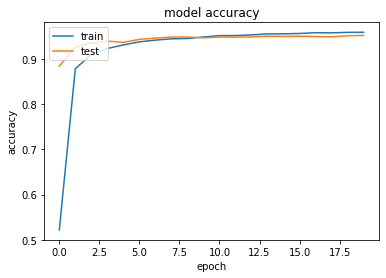

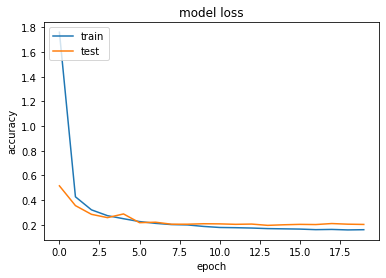

In [24]:
#Summarize hist for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

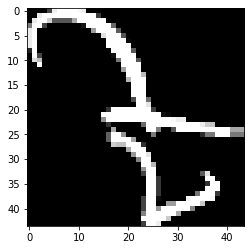

In [25]:
test_image = X_test[0:1]
plt.imshow(X_test[0])

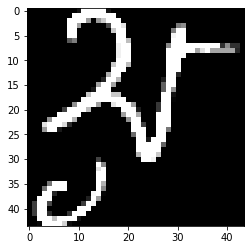

In [26]:
plt.imshow(X_test[85])

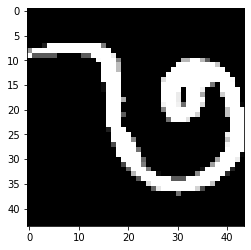

In [27]:
plt.imshow(X_test[26])

In [39]:
preds = np.round(model.predict((X_test,y_test)),0)
print("rounded test_labels",preds)

rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
test_labels = np.array((y_test))

In [49]:
experiment_labels = ['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ','‍ঁ','০','১','২','৩','৪','৫','৬','৭','৮','৯']
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           অ       0.98      0.97      0.98       395
           আ       0.99      0.98      0.99       382
           ই       0.99      0.94      0.96       374
           ঈ       0.98      0.96      0.97       383
           উ       0.95      0.88      0.92       362
           ঊ       0.95      0.98      0.96       356
           ঋ       0.90      0.88      0.89       398
           এ       0.98      0.89      0.93       417
           ঐ       0.96      0.92      0.94       381
           ও       0.98      0.94      0.96       395
           ঔ       0.96      0.97      0.96       380
           ক       0.96      0.97      0.96       377
           খ       0.98      0.97      0.98       366
           গ       0.99      0.98      0.99       381
           ঘ       0.99      0.98      0.98       357
           ঙ       0.96      0.92      0.94       410
           চ       0.88      0.92      0.90       363
           ছ       0.91    

C:\Users\Ashik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


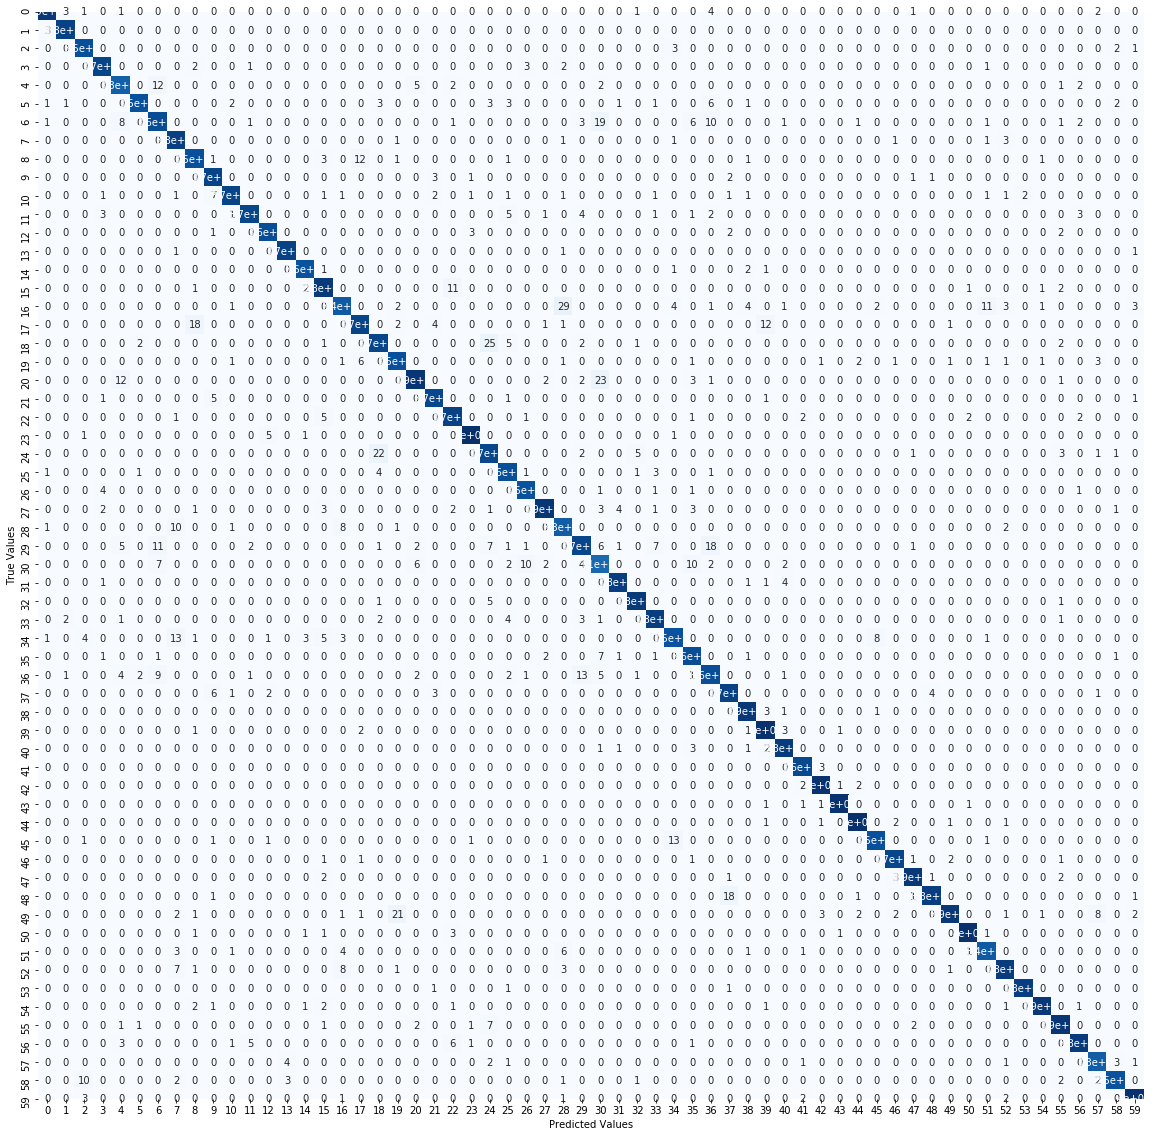

In [54]:
fig = plt.figure(figsize=(20, 20))

pred = model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();